# Fondamenti di elaborazione immagini

## Effettuiamo l'import delle librerie utilizzate nell'esercitazione.

In [1]:
import cv2                                      # opencv
import numpy as np                              # numpy
import matplotlib as mapli                      # matplotlib
import matplotlib.pyplot as plt                 # sottomodulo pyplot di matplotlib
from mpl_toolkits.axes_grid1 import ImageGrid   # classe per la creazione di griglie immagini

Per completezza, verifichiamone la versione installata.

In [2]:
print(f'opencv version:\t\t{cv2.__version__}')
print(f'numpy version:\t\t{np.__version__}')
print(f'matplolib version:\t{mapli.__version__}')

opencv version:		4.9.0
numpy version:		1.26.0
matplolib version:	3.8.0


Di seguito i riferimenti alle pagine di documentazione, sempre utiliti:

* Rif: [numpy](https://numpy.org/doc/stable/)
* Rif: [opencv](https://docs.opencv.org/)
* Rif: [matplotlib](https://matplotlib.org/stable/index.html)

Con il seguente comando diamo la possibilita' al notebook di mostrare direttamente i plot di _matplotlib_

In [14]:
%matplotlib inline

## _Carichiamo, per prima cosa, un'immagine da disco._

In [25]:
loaded_img = cv2.imread('./imgs/kitten.png')

Il metodo principale di lettura delle immagini da disco è _imread_.

* Rif: [imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

Ad imread e' possibile assegnare un ulteriore argomento, un flag, che indica in quale formato caricare l'immagine indicata.

* Rif: [imread flag](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822)

## _L'immagine caricata puo' essere salvata su disco._

In [4]:
cv2.imwrite('./imgs/bin/saved.png', loaded_img)

True

Il salvataggio si può effettuare con il metodo _imwrite_. Il formato del file dipende dall'estensione indicata nel nome del file.

* Rif: [imwrite](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)

## _Per mostrare a video l'immagine ci sono diverse opzioni: vediamo le due principali._

Mettiamo quindi a confronto _opencv_ e _matplotlib_.

In [27]:
cv2.imshow("opencv imshow", loaded_img)
cv2.waitKey(3000)
cv2.destroyAllWindows()

Per mostrare un'immagine a video con _opencv_, la prassi è quella di lanciare il metodo _imshow_ indicando il titolo della finestra che comparira' e l'immagine da mostrare. Il metodo successivo, _waitKey_, indica di mostrare la finestra per un tempo in millisecondi configurabile o fino alla pressione di un tasto; non fornendo un argomento o passando 0, si attenderà la pressione di un tasto. Il metodo _destroyAllWindows_ chiude tutte le finestre precedentemente aperte.

_Nota: la pressione della x rossa nella finestra di presentazione dell'immagine non viene catturata come key e questo potrebbe risultare in uno script bloccato o una cella di jupiter notebook in attesa infinita. Per questo motivo e' preferibile mostrare a video le immagini sfruttando un metodo alternativo che utilizza la libreria matplotlib._

* Rif: [imshow](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563)
* Rif: [waitKey](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7)
* Rif: [destroyAllWindows](https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481)

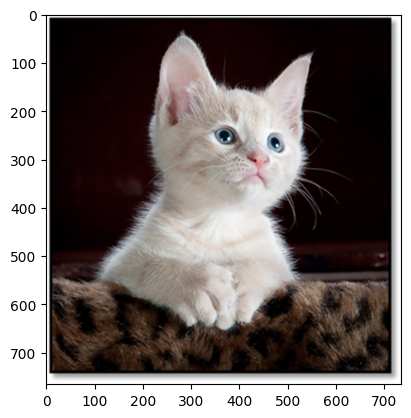

In [6]:
plt.imshow(cv2.cvtColor(loaded_img, cv2.COLOR_BGR2RGB)) #cvtColor cambia la palette da blue green red a red green e blue, questo perchè open cv ha la prima mentre mpl la seconda 
plt.show()

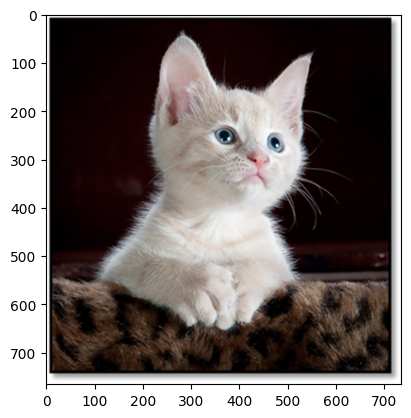

In [7]:
plt.imshow(loaded_img[...,::-1]) #... indica di selezionare tutte le dimensioni dell'array, mentre ::-1 indica di invertire l'ordine degli elementi lungo l'ultima dimensione dell'array, cioè fa la stessa cosa di cui sopra senza invertire le palette
plt.show()

Definiamo una funzione ad hoc per semplificarci il codice durante la conversione bgr-rgb.

In [34]:
def rgb(image : np.array) -> np.array:
    return image[...,::-1]

def rgb_v2(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Le funzioni sono equivalenti a livello di funzionalita'.

Tramite il sottomodulo *pyplot* di _matplotlib_ e' possibile invocare i metodi _imshow_ e _show_. Il primo disegnera' l'immagine nella _figura_ corrente e il secondo mostrera' a video la figura.

* Rif: [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
* Rif: [show](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)

_Nota 1: se al metodo imshow viene fornita una immagine letta tramite la libreria cv2, sara' necessario effettuare una conversione colore in quanto opencv memorizza le informazioni colore come blue-verde-rosso (bgr) mentre matplotlib le attende come rosso-verde-blu (rgb). In caso di dimenticanza, l'immagine mostrata avra' i piani colore rosso e blu invertiti._

_Nota 2: la conversione avviene utilizzando il metodo cvtColor e indicando il piano colore di partenza e destinazione._

* Rif: [cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
* Rif: [ColorConversionCodes](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

## _Il metodo di caricamento di immagini colore e in scala di grigi non differisce in opencv._

Di seguito procediamo a caricare un'immagine colore, una in scala di grigi ed una binaria per poi mostrarle con _matplotlib_.

In [5]:
colo_img = cv2.imread('./imgs/pig/color.png', cv2.IMREAD_COLOR)    # carico l'immagine colore.
gray_img = cv2.imread('./imgs/pig/gray.png', cv2.IMREAD_GRAYSCALE) # carico l'immagine in scala di grigi.
mask_img = cv2.imread('./imgs/pig/mask.bmp', cv2.IMREAD_GRAYSCALE) # carico l'immagine della maschera binaria.

Usando i flag del metodo _imread_, indichiamo la modalita' di lettura delle immagini e di conseguenza le dimensioni assegnate. Possiamo verificarle stampando la _shape_.

In [6]:
print(f'Colore:\t\t{colo_img.shape}')
print(f'Scala di grigi:\t{gray_img.shape}')
print(f'Maschera:\t{mask_img.shape}')

Colore:		(8, 8, 3)
Scala di grigi:	(8, 8)
Maschera:	(8, 8)


Mostriamo quindi il risultato in una griglia _matplotlib_ che metta a confronto le immagini.

_**Nota**: per le immagini in scala di grigio non e' necessario fare inversione bgr-rgb perche' hanno un solo piano colore._

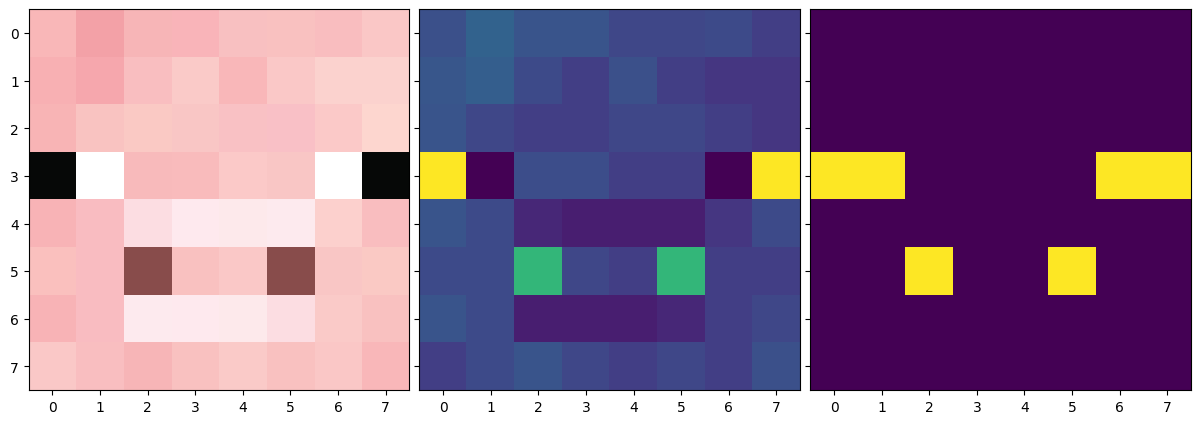

In [37]:
fig = plt.figure(figsize=(15,15))                               # prendo un riferimento alla figura su cui andro' a disegnare.
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.1)    # creo una griglia immagini 1x3 nella figura.
                                                                # specifica la posizione della griglia all'interno della figura. In questo caso, 111 indica che la griglia verrà posizionata nell'unica cella della griglia principale.

for ax, im in zip(grid, [rgb(colo_img), gray_img, mask_img]):   # assegno ad ogni cella un'immagine.
    ax.imshow(im)

plt.show()

Matplotlib semplifica la rappresentazione delle immagini in griglia tramite la classe *ImageGrid* al quale va fornita una _figura_ sulla quale disegnare e che, a sua volta, fornisce gli assi sui quali andare a rappresentare ogni immagine indicata dalla coppia [riga-colonna].

* Rif: [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)
* Rif: [ImageGrid](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.axes_grid.ImageGrid.html)

Definiamo altre due funzioni di utilita' per semplificare la conversione in scala di grigi e la visualizzazione in griglia.

In [7]:
def gray(image : np.array) -> np.array:
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def grid(images : list[np.array], rows : int, cols : int, size : int, colors : list[str] = None) -> None:
    fig = plt.figure(figsize=(size,size))
    grid = ImageGrid(fig, 111, nrows_ncols=(rows, cols), axes_pad=0.1)

    if colors is not None:
        counter = 0
        for ax, im in zip(grid, images):
            ax.imshow(im, cmap=colors[counter])
            counter = (counter + 1) % len(colors)
        plt.show()
    else:
        for ax, im in zip(grid, images):
            ax.imshow(im)
        plt.show()

## _In python esiste un legame diretto fra le librerie di **opencv** e **numpy**._

Lo possiamo vedere direttamente dal tipo di dato assegnato alle immagini caricate con _opencv_.

In [8]:
print(f'image type: {type(gray_img)}')

image type: <class 'numpy.ndarray'>


Le immagini, di conseguenza, non sono altro che matrici (spesso multidimensionali) di numeri.

In [40]:
print(gray_img)

[[ 61  78  64  64  53  53  56  46]
 [ 66  74  56  46  61  46  39  39]
 [ 64  53  46  46  53  53  46  39]
 [248   0  59  59  46  46   0 248]
 [ 64  56  28  21  21  21  39  56]
 [ 56  56 164  53  46 164  46  46]
 [ 64  56  21  21  21  28  46  53]
 [ 46  56  64  53  46  53  46  61]]


## _Le dimensioni di queste matrici non saranno altro che larghezza, altezza e numero di canali dell'immagine._

In [9]:
# Trattando l'immagine come matrice, possiamo chiederne le dimensioni.
print(f'Dimensioni della matrice:\t{colo_img.shape}')
print(f'Larghezza:\t\t\t{colo_img.shape[0]}')
print(f'Altezza:\t\t\t{colo_img.shape[1]}')
print(f'Numero di canali:\t\t{colo_img.shape[2]}')

Dimensioni della matrice:	(8, 8, 3)
Larghezza:			8
Altezza:			8
Numero di canali:		3


## _Un'immagine colore puo' essere convertita in scala di grigi e viceversa._

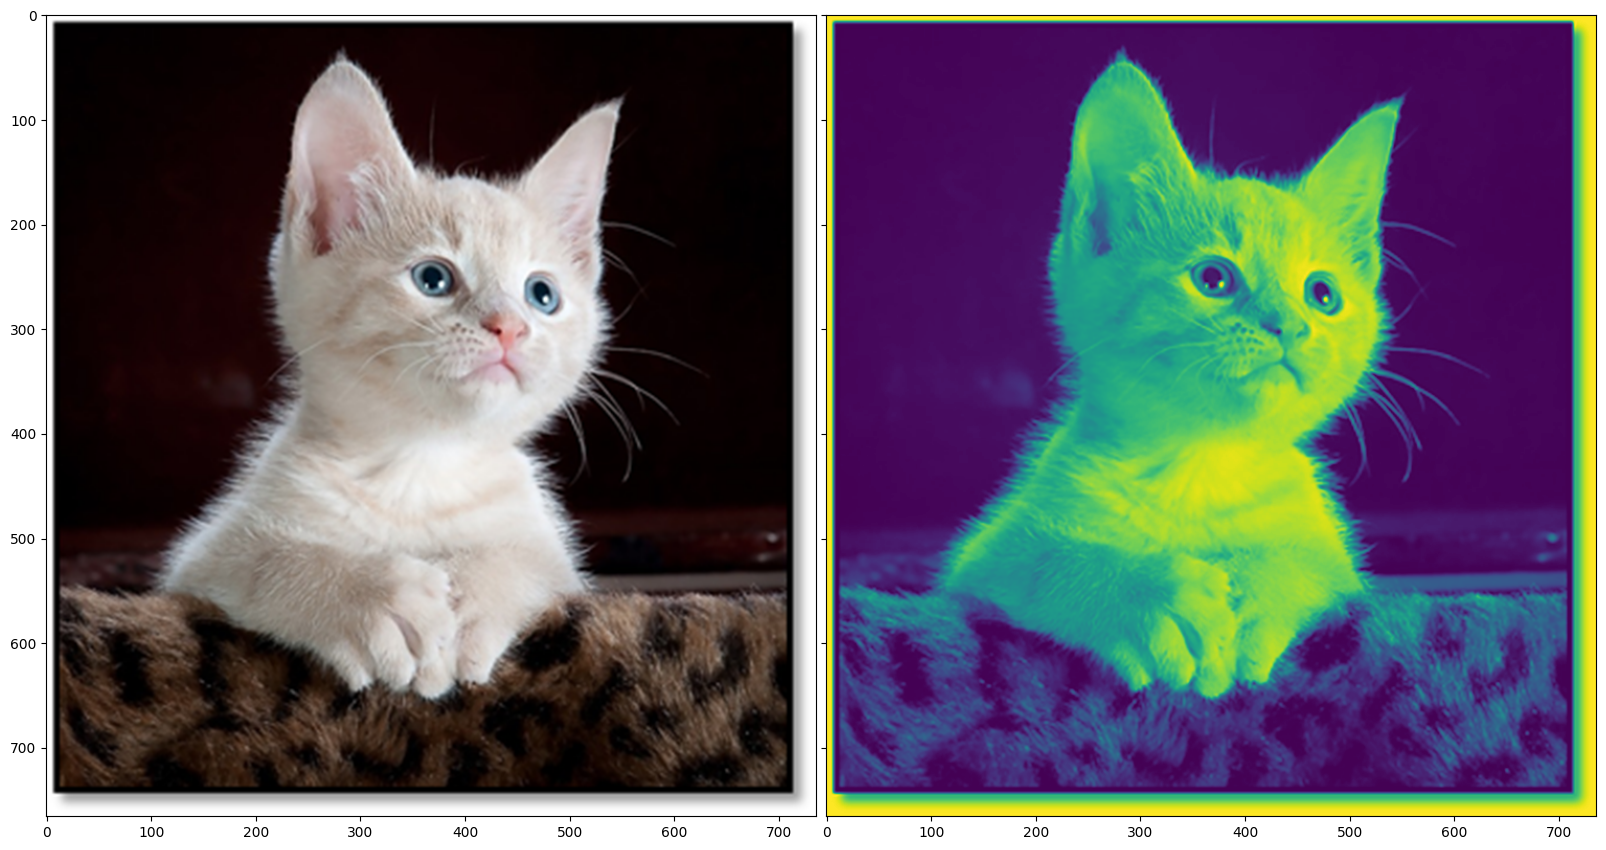

In [42]:
color_as_gray_img = cv2.cvtColor(loaded_img, cv2.COLOR_BGR2GRAY)    # effettuo la conversione da RGB a grayscale.

grid([rgb(loaded_img), color_as_gray_img], 1, 2, 20)

La rappresentazione di una immagine in scala di grigi sfrutta l'uso di una palette colori configurabile. Il default e' _viridis_. Cambiando la palette, cambia la rappresentazione visiva dell'immagine ma non il suo contenuto.

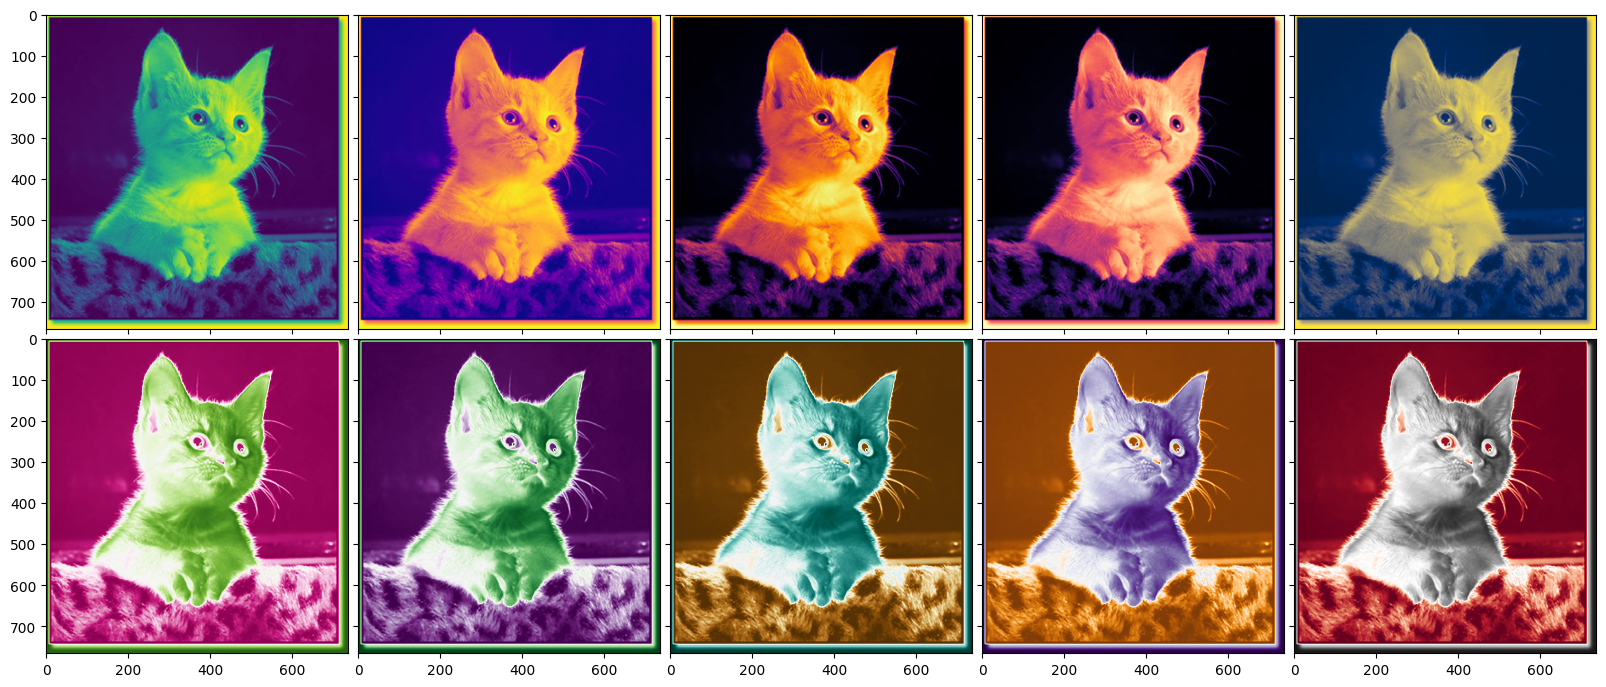

In [43]:
fig = plt.figure(figsize=(20,20))                               # prendo un riferimento alla figura su cui andro' a disegnare.
grd = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.1)    # creo una griglia immagini 2x5 nella figura.

# definisco la lista delle palette da mostrare.
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy']

# assegno ad ogni cella l'immagine rappresentata con diverse palette.
for i, ax in enumerate(grd):
    ax.imshow(color_as_gray_img, cmap=cmaps[i])

plt.show()

## _Le immagini colore, o matrici multidimensionali, possono essere separate nei singoli piani/canali._

Separare un'immagine colore permettera' quindi di accede ai piani r, g e b. L'estrazione di piani puo' essere fatta in diversi modi; di seguito vediamo _opencv_ e _numpy_.

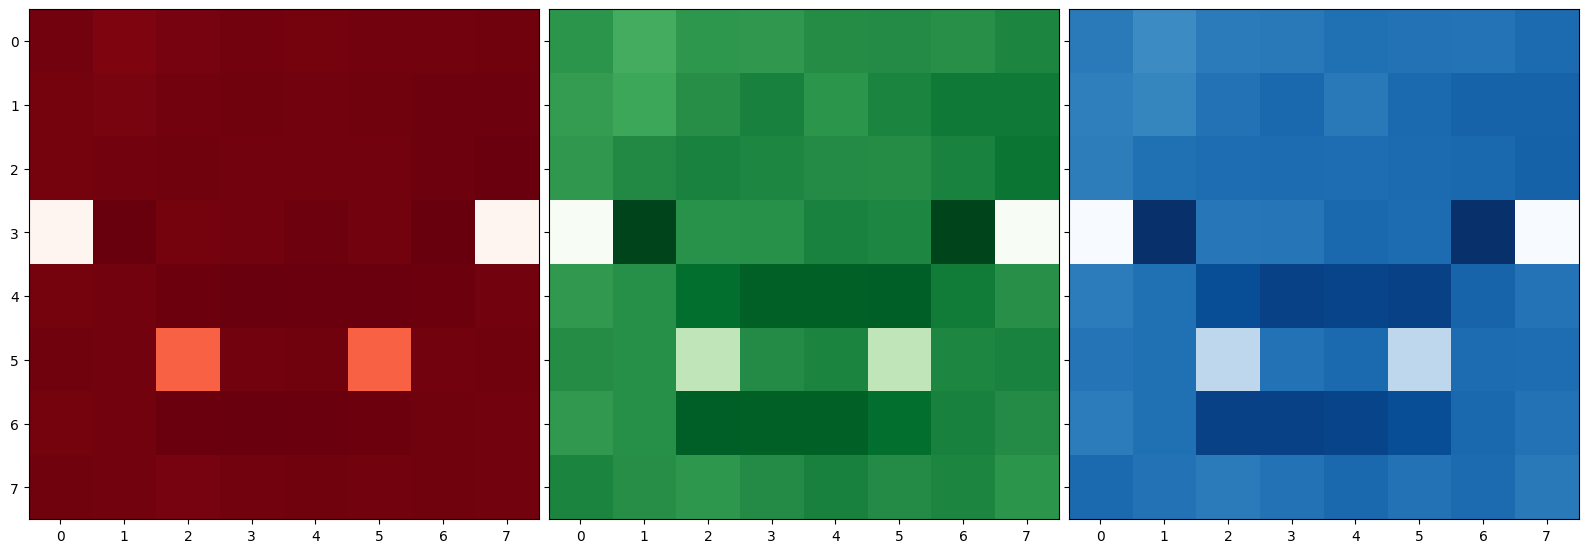

In [14]:
b_plane, g_plane, r_plane = cv2.split(colo_img) # estraggo i piani.

cmaps = ['Reds', 'Greens', 'Blues'] # mostro i piani con una palette che li rappresenti.

grid([r_plane, g_plane, b_plane], 1, 3, 20, cmaps)

Per dividere un'immagine colore nei suoi piani con _opencv_ e' possibile utilizzare il metodo _split_.

* Rif: [split](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)

Proviamo ad ottenere lo stesso risultato lavorando direttamente sulla matrice.

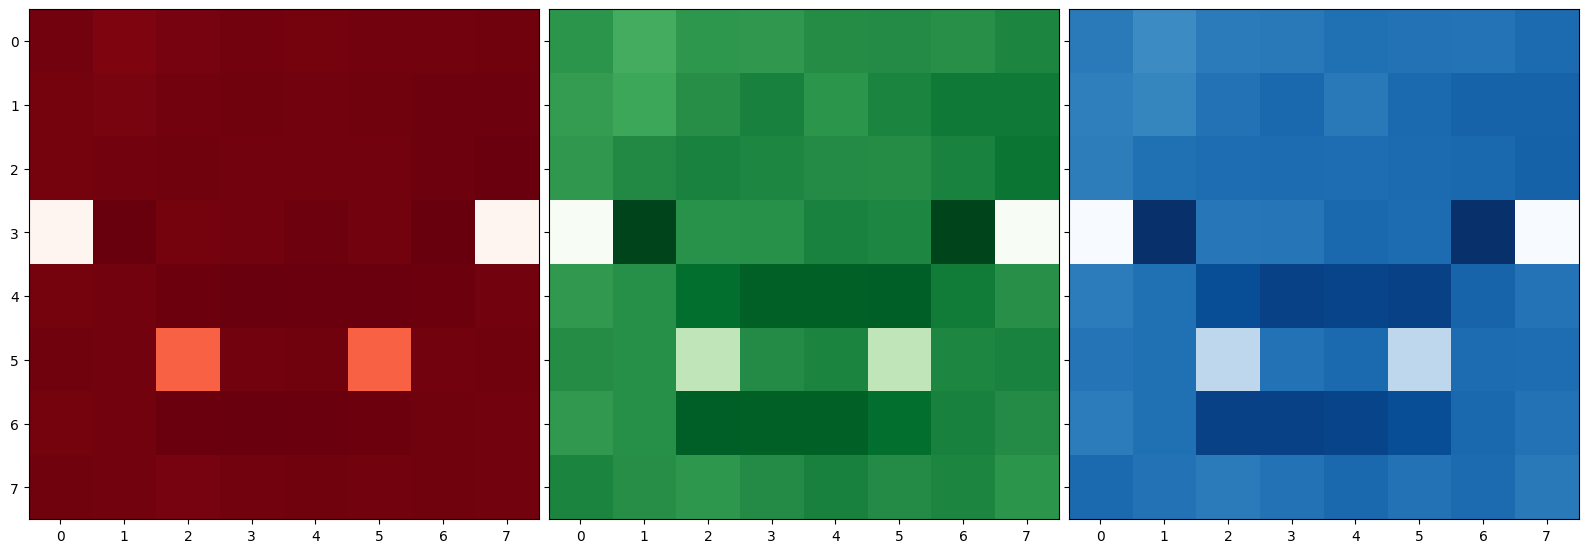

In [45]:
r_plane = colo_img[:,:,2]   # estrazione piano rosso.
g_plane = colo_img[:,:,1]   # estrazione piano verde.
b_plane = colo_img[:,:,0]   # estrazione piano blu.

grid([r_plane, g_plane, b_plane], 1, 3, 20, cmaps)

## _L'operazione contraria, il merge di piani, e' altrettanto possibile._

Come in precedenza, esistono diversi modi ma vederemo come fare con _opencv_ e _numpy_. Per vederne l'efficacia, carichiamo da disco 3 maschere binarie che rappresentano singolarmente un cerchio completamente rosso, verde e blu. La combinazione di queste immagini mono produrra' un'immagine colore correttamente combinata.

In [29]:
r_sample = cv2.imread('./imgs/rgb/r.png', cv2.IMREAD_GRAYSCALE)    # carico un'immagine grayscale che rappresentera' il piano rosso.
g_sample = cv2.imread('./imgs/rgb/g.png', cv2.IMREAD_GRAYSCALE)    # carico un'immagine grayscale che rappresentera' il piano verde.
b_sample = cv2.imread('./imgs/rgb/b.png', cv2.IMREAD_GRAYSCALE)    # carico un'immagine grayscale che rappresentera' il piano blu.

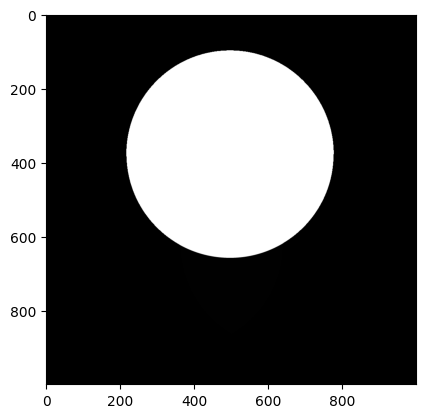

In [35]:
riccardo = cv2.imread('./imgs/rgb/r.png')
plt.imshow(cv2.cvtColor(riccardo, cv2.COLOR_BGR2RGB))

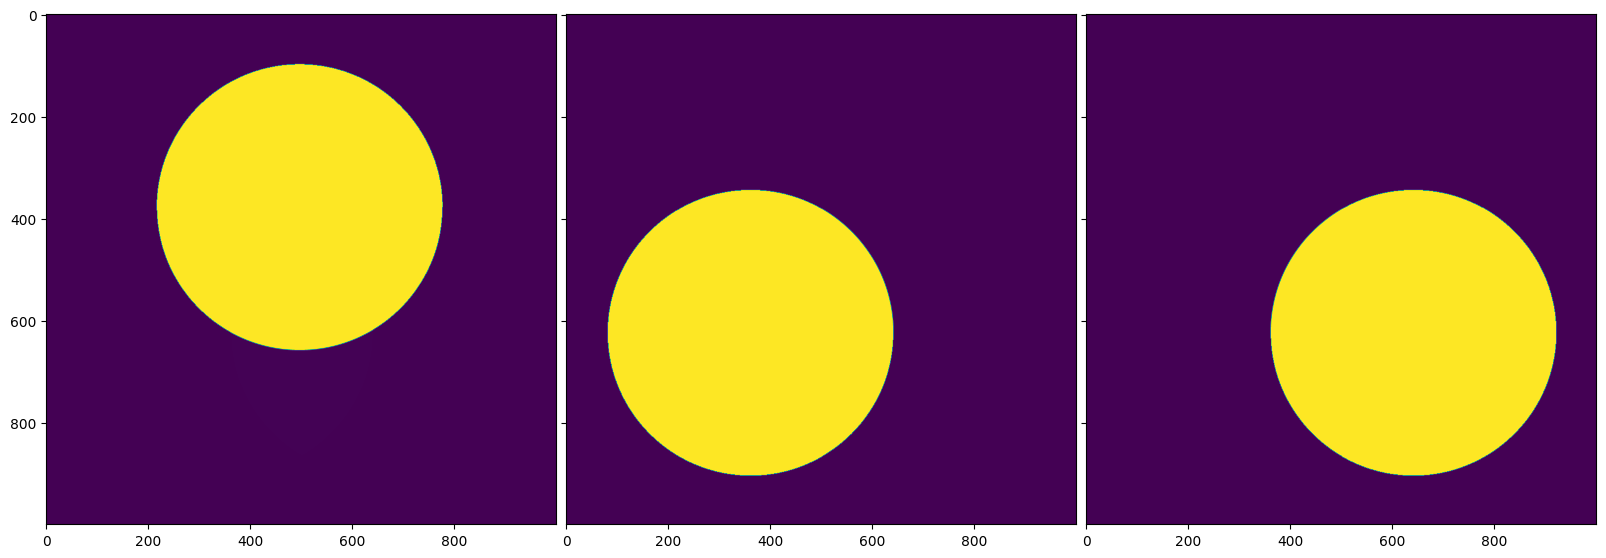

In [18]:
grid([r_sample, g_sample, b_sample], 1, 3, 20)

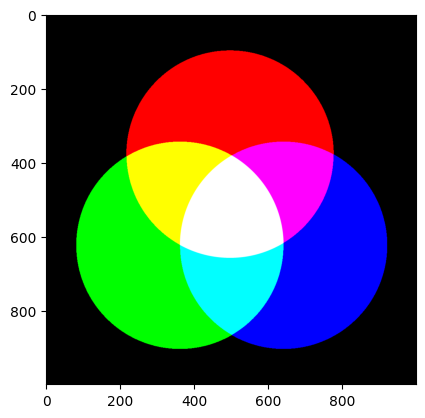

In [16]:
rgb_sample = cv2.merge([r_sample, g_sample, b_sample])              # combino i canali assieme.
plt.imshow(rgb_sample)
plt.show()

Per effettuare l'unione di piu' canali grayscale in un'immagine colore e' possibile utilizzare il metodo _merge_.

* Rif: [merge](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga7d7b4d6c6ee504b30a20b1680029c7b4)

Proviamo ad ottenere lo stesso risultato lavorando direttamente sulla matrice.

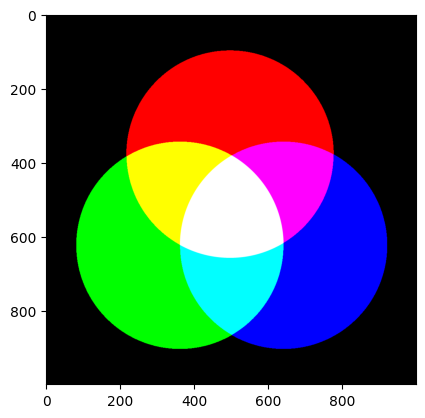

In [48]:
rgb_sample = np.stack([r_sample, g_sample, b_sample], axis=2)       # compatto i canali assieme.
plt.imshow(rgb_sample)
plt.show()

In questo caso, e' stato utilizzato il metodo _stack_, fornito da *numpy*, al quale si forniscono le informazioni dei canali e si indica di raggrupparle nella terza dimensione disponibile (non width, non height ma channels). 

* Rif: [stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)

Nell'esempio indicato sopra, si sono unite tre griglie di numeri di dimensione 1000x1000x1 in una griglia 1000x1000x3.

In [49]:
print(f'Dimensione singolo piano:\t{r_sample.shape}')
print(f'Dimensione immagine combinata:\t{rgb_sample.shape}')

Dimensione singolo piano:	(1000, 1000)
Dimensione immagine combinata:	(1000, 1000, 3)
